In [60]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from aimanager.utils.utils import make_dir

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

folder = '../data'
merge_file = 'pilot_random1'
plot_folder = '../plots/pilot_random1'

make_dir(plot_folder)

In [61]:
df = pd.read_csv(os.path.join(folder, f'{merge_file}_player_round.csv'))
df2 = pd.read_parquet(os.path.join('../data/dev/data', 'artificial_human_simulation.parquet'))

In [62]:
df.columns

Index(['session', 'group_id', 'round_number', 'participant_code',
       'contribution', 'player_no_input', 'punishment_rule_s',
       'punishment_rule_b', 'punishment_rule_c', 'punishment',
       'manager_no_input', 'total_contribution', 'common_good',
       'total_punishment', 'episode', 'experiment_name', 'player_role',
       'payoff', 'experiment_pool', 'episode_length', 'global_group_id',
       'player_id', 'episode_id'],
      dtype='object')

In [63]:
df2.columns

Index(['value', 'name', 'round_number', 'episode'], dtype='object')

In [64]:
df.groupby('experiment_name')['player_no_input'].value_counts(normalize=True)

experiment_name  player_no_input
random_1         0                  0.984375
                 1                  0.015625
trail_rounds_2   0                  0.972304
                 1                  0.027696
Name: player_no_input, dtype: float64

In [65]:
df['common_good'] = df['contribution'] * 1.6 - df['punishment']

df['experiment_name'] = df['experiment_name']# + ' eps ' + df['episode'].astype(str)

df['round_number'] = df['round_number'] + (df['episode']-1) * 8

df2['experiment_name'] = 'simmulation'
df2['episode'] = 1
value_map = {
    'contributions': 'contribution',
    'punishments': 'punishment',
    'common_good': 'common_good',
}
df2['name'] = df2['name'].map(value_map)

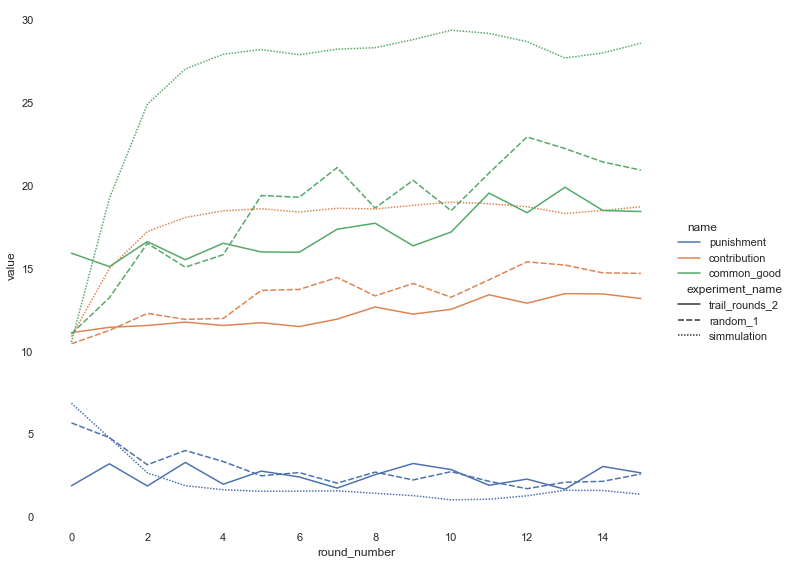

In [67]:

dfm = df.melt(
    id_vars=['global_group_id', 'round_number', 'participant_code', 'episode', 'experiment_name'], 
    value_vars=['punishment', 'contribution', 'common_good'], value_name='value', var_name='name')

dfm = pd.concat([dfm, df2]).reset_index(drop=True)

dfm['episode'] = dfm['episode'].astype(str)

g = sns.relplot(
    data=dfm,
    x="round_number", y="value",
    # col='episode',
    hue='name',
    kind="line",
    style='experiment_name',
    height=8, aspect=1.2, ci=None,
)
plt.savefig(os.path.join(plot_folder, 'temporal.jpg'), dpi=300, transparent=False)